In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

In [60]:
auto_mpg_df = pd.read_table('auto-mpg.data-original.csv', delimiter=',').dropna()
auto_mpg_df.head()

,MPG,Cylinders,Displacement,horsepower,Weight,Acceleration,Model_Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [61]:
auto_mpg_df['Displacement'] = np.log(auto_mpg_df['Displacement'])
auto_mpg_df['Weight'] = np.log(auto_mpg_df['Weight'])
auto_mpg_df['MPG'] = np.log(auto_mpg_df['MPG'])
#auto_mpg_df['horsepower'] = np.log(auto_mpg_df['horsepower'])

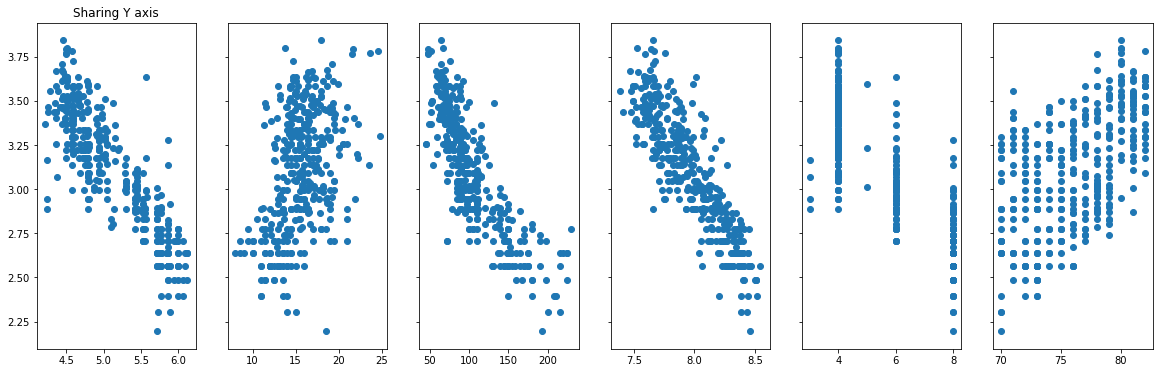

In [62]:
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize=(20,6))
ax1.scatter(auto_mpg_df['Displacement'], auto_mpg_df['MPG'])
ax1.set_title('Sharing Y axis')
ax2.scatter(auto_mpg_df['Acceleration'], auto_mpg_df['MPG'])
ax3.scatter(auto_mpg_df['horsepower'], auto_mpg_df['MPG'])
ax4.scatter(auto_mpg_df['Weight'], auto_mpg_df['MPG'])
ax5.scatter(auto_mpg_df['Cylinders'], auto_mpg_df['MPG'])
ax6.scatter(auto_mpg_df['Model_Year'], auto_mpg_df['MPG'])
plt.show()

In [64]:
#Drop all the cylinder 3 and 5 data because we don't have enough of them to make good prediction for them
cy5 = auto_mpg_df[auto_mpg_df['Cylinders'] == 5]
cy3 = auto_mpg_df[auto_mpg_df['Cylinders'] == 3]
#my71 = auto_mpg_df[auto_mpg_df['Model_Year'] == 71]
cytodrop = pd.concat([cy3, cy5])
cyindex = cytodrop.index.values
auto_mpg_df = auto_mpg_df.drop(cyindex)

In [65]:
X_noDummie = auto_mpg_df.drop(['MPG', 'Car Name', 'Model_Year'], 1)
y_noDummie = auto_mpg_df['MPG']

X_train, X_test, y_train, y_test = train_test_split(X_noDummie, y_noDummie, test_size=0.2, random_state=20)
X_noDummie.head()

,Cylinders,Displacement,horsepower,Weight,Acceleration,Origin
0,8,5.726848,130.0,8.161660,12.0,1
1,8,5.857933,165.0,8.214194,11.5,1
2,8,5.762051,150.0,8.142063,11.0,1
3,8,5.717028,150.0,8.141190,12.0,1
4,8,5.710427,140.0,8.145840,10.5,1


In [66]:
ridgeregr = linear_model.Ridge(alpha=100, fit_intercept=True)

ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_test, y_test))
print('Cross Validation')
print(cross_val_score(ridgeregr, X_test, y_test, cv=5))

0.799734571721
Cross Validation
[ 0.6094151   0.73173631  0.78240156  0.82155156  0.57170189]


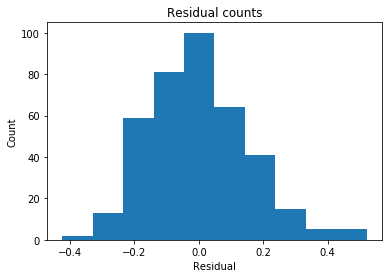

In [67]:
# Extract predicted values.
predicted = ridgeregr.predict(X_noDummie).ravel()
actual = y_noDummie

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

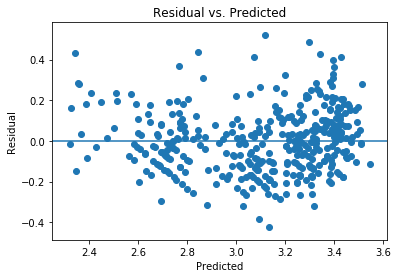

In [68]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [69]:
# Create a set of dummy variables from the sex variable
df_Cylinders = pd.get_dummies(auto_mpg_df['Cylinders'])
#df_Model_Year = pd.get_dummies(auto_mpg_df['Model_Year'])
df_Origin = pd.get_dummies(auto_mpg_df['Origin'])

# Join the dummy variables to the main dataframe
auto_mpg_df = pd.concat([auto_mpg_df, df_Cylinders, df_Origin], axis=1)
auto_mpg_df = auto_mpg_df.drop(['Cylinders', 'Origin'], 1).drop('Car Name', 1)
auto_mpg_df.head()

,MPG,Displacement,horsepower,Weight,Acceleration,Model_Year,4,6,8,1,2,3
0,2.890372,5.726848,130.0,8.161660,12.0,70,0,0,1,1,0,0
1,2.708050,5.857933,165.0,8.214194,11.5,70,0,0,1,1,0,0
2,2.890372,5.762051,150.0,8.142063,11.0,70,0,0,1,1,0,0
3,2.772589,5.717028,150.0,8.141190,12.0,70,0,0,1,1,0,0
4,2.833213,5.710427,140.0,8.145840,10.5,70,0,0,1,1,0,0


In [78]:
X = auto_mpg_df.drop('MPG', 1)
y = auto_mpg_df['MPG']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=20)

In [79]:
ridgeregr = linear_model.Ridge(alpha=5, fit_intercept=True)

ridgeregr.fit(X_train2, y_train2)
print(ridgeregr.score(X_test2, y_test2))
print('Cross Validation')
print(cross_val_score(ridgeregr, X_train2, y_train2, cv=5))

0.885153434901
Cross Validation
[ 0.86456469  0.87723342  0.87696728  0.87786842  0.88461137]


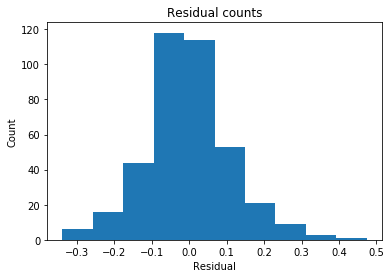

In [80]:
# Extract predicted values.
predicted = ridgeregr.predict(X).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

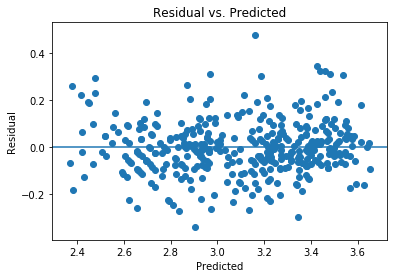

In [81]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [27]:
# ###### High multi-corrilation, applying PCA
# Standardizing the features
X_pca = auto_mpg_df.drop('MPG', 1)
X_pca = pd.DataFrame(StandardScaler().fit_transform(X_pca))

pca = PCA(n_components=0.99, svd_solver='full')
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents)
#principalDf.columns = ['zero','one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen']
#principalDf['MPG'] = auto_mpg_df['MPG']
principalDf.head()

,0,1,2,3,4,5,6
0,2.968557,-1.262797,0.097765,0.352749,0.845260,-0.095004,0.688005
1,3.453872,-1.449451,0.051880,0.450327,0.636303,-0.175649,0.259570
2,3.219144,-1.473614,0.029039,0.450001,0.720076,-0.415737,0.541763
3,3.092045,-1.344239,0.078741,0.395156,0.793716,-0.136375,0.504239
4,3.152929,-1.504458,0.013670,0.455169,0.728408,-0.562918,0.661547


In [28]:
X_cpa = principalDf
y_cpa = auto_mpg_df['MPG']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_cpa, y_cpa, test_size=0.2)

In [29]:
ridgeregr3 = linear_model.Ridge(alpha=10, fit_intercept=True)

ridgeregr3.fit(X_train3, y_train3)
print(ridgeregr3.score(X_test3, y_test3))
print('Cross Validation')
print(cross_val_score(ridgeregr3, X_test3, y_test3, cv=5))

0.887174039178
Cross Validation
[ 0.91473761  0.83233533  0.90103027  0.84368367  0.79995858]


In [30]:
# Extract predicted values.
predicted = ridgeregr.predict(X_cpa).ravel()
actual = y_cpa

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

ValueError: shapes (385,7) and (11,) not aligned: 7 (dim 1) != 11 (dim 0)

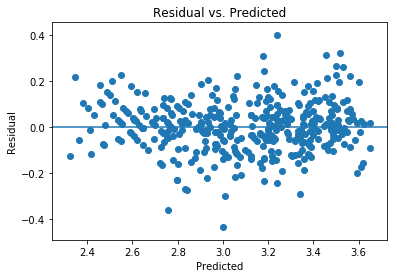

In [208]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()